Notebook para demostrar las distintas interpolaciones y sus resultados sobre una escena de prueba del dataset de KITTI

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as io
import cv2
from pointcloud_utils_functions_v2 import *

In [2]:
kitti_pointcloud_path = r'D:\Nicolas\Posgrado\Trabajos y Tesis\LIDAR\Datasets LIDAR\kitti\kitti_3d_object\training\velodyne\001068.bin'
kitti_image_path = r'D:\Nicolas\Posgrado\Trabajos y Tesis\LIDAR\Datasets LIDAR\kitti\kitti_3d_object\training\image_2\001068.png'

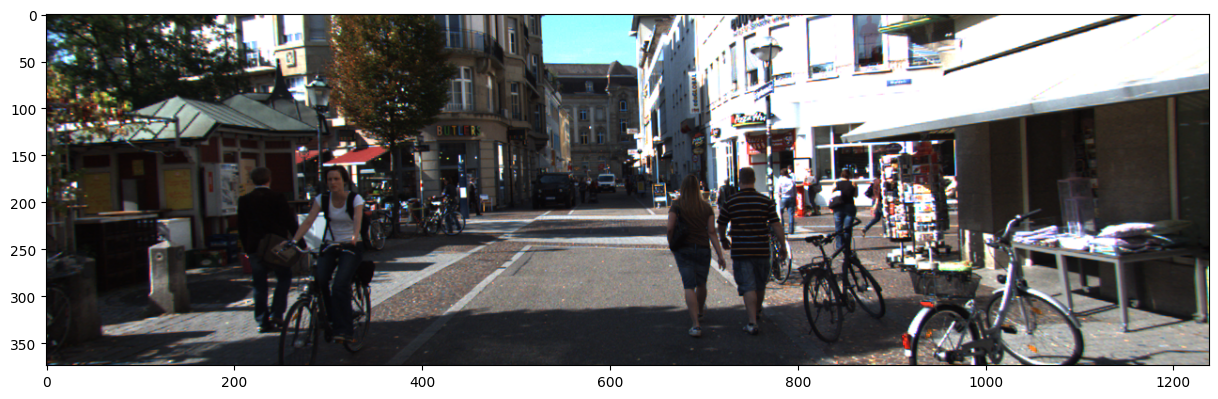

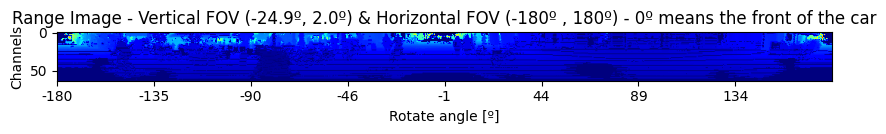

Size: (64, 1024)


In [3]:
pointcloud = read_bin(kitti_pointcloud_path)
range_image = pointcloud_to_range_image(pointcloud, filter_ego_compensed=False, size=(64,1024))
rgb_image = io.imread(kitti_image_path)

plt.figure(figsize=(15,5))
plt.imshow(rgb_image)
plt.show()

display_range_image(range_image)

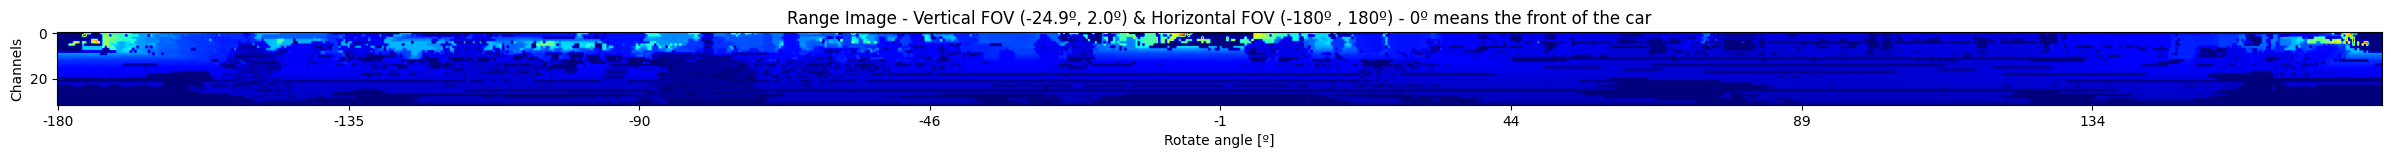

Size: (32, 1024)


In [4]:
indexes = range(0, 64, 2)
lrimg = range_image[indexes]
display_range_image(lrimg)

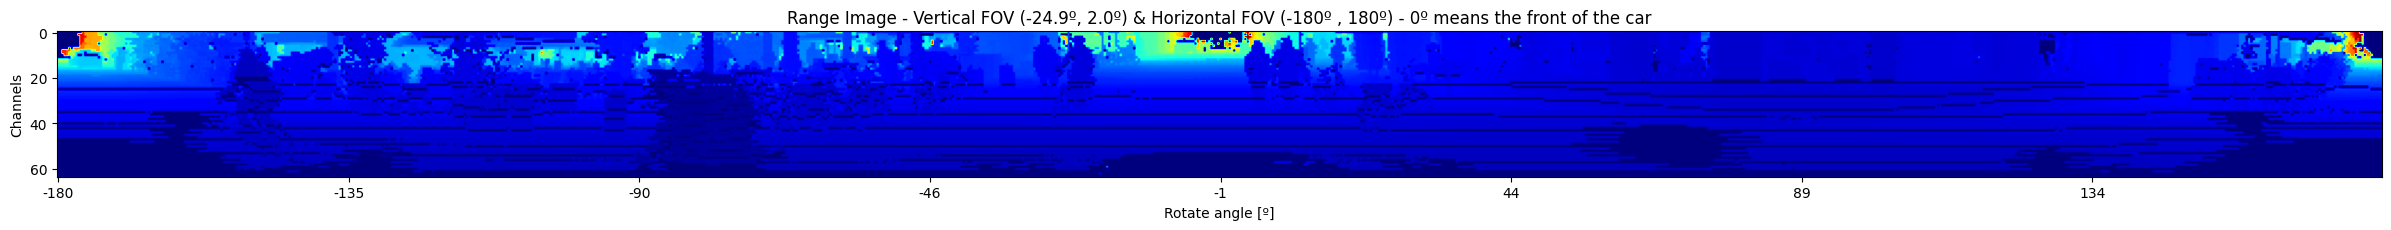

Size: (64, 1024)


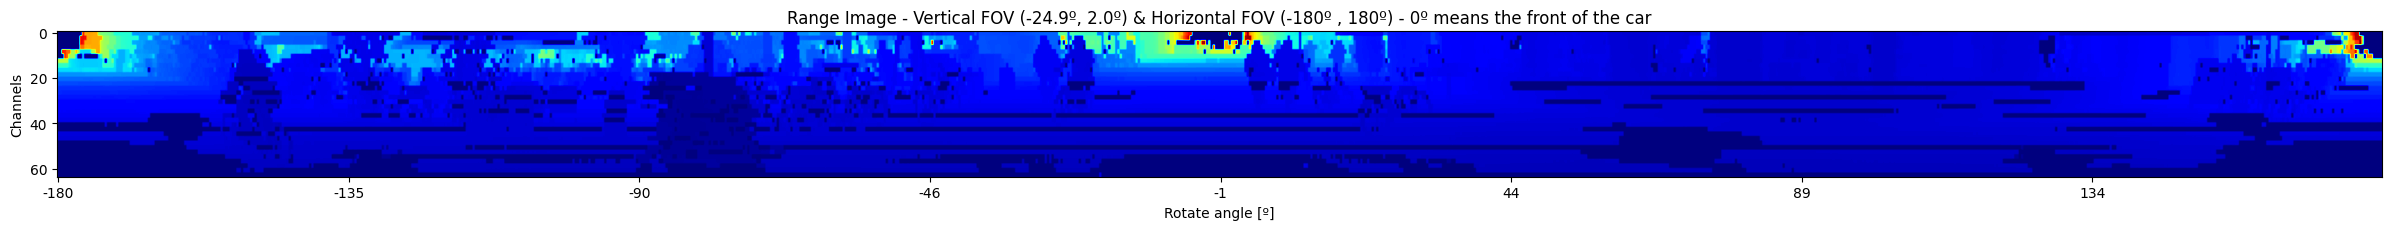

Size: (64, 1024)


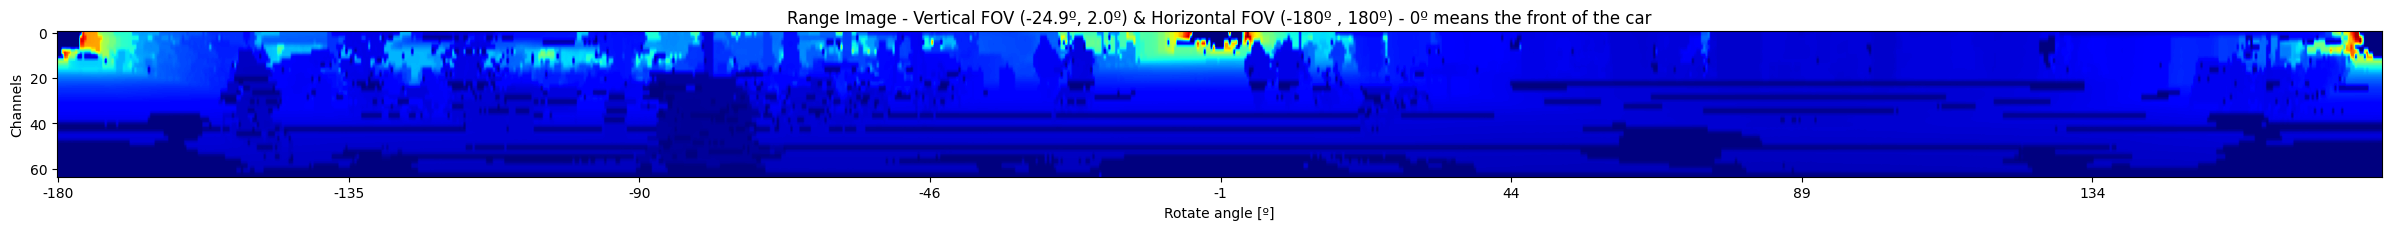

Size: (64, 1024)


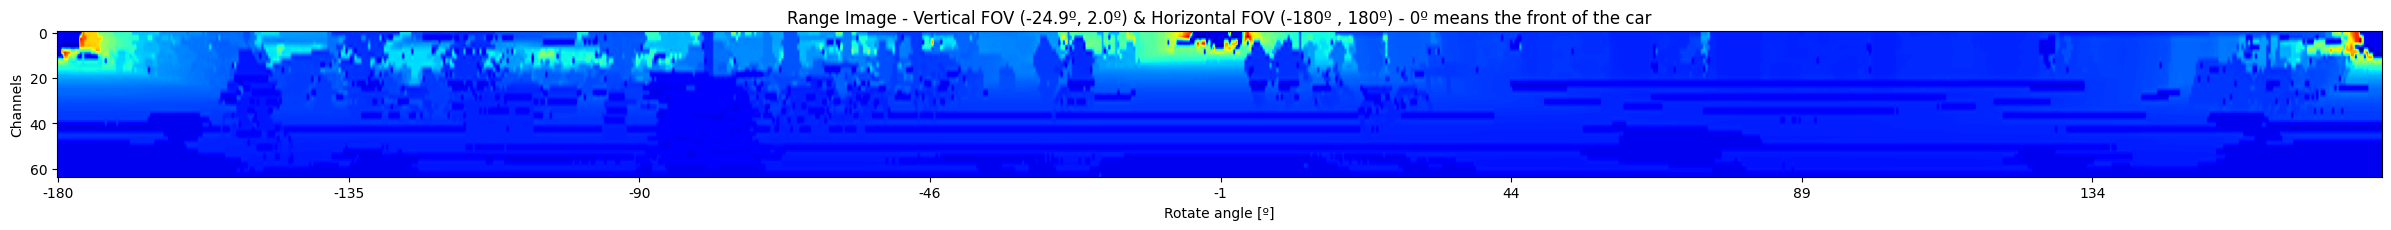

Size: (64, 1024)


In [33]:
nearest_interpolation = cv2.resize(lrimg, (1024,64), interpolation=cv2.INTER_NEAREST)
bilineal_interpolation = cv2.resize(lrimg, (1024,64), interpolation=cv2.INTER_LINEAR)
cubic_interpolation = cv2.resize(lrimg, (1024,64), interpolation=cv2.INTER_CUBIC)

display_range_image(range_image)
display_range_image(nearest_interpolation)
display_range_image(bilineal_interpolation)
display_range_image(cubic_interpolation)


nearest_interpolation_pcd = range_image_to_pointcloud(nearest_interpolation)
bilieal_interpolation_pcd = range_image_to_pointcloud(bilineal_interpolation)
cubic_interpolation_pcd = range_image_to_pointcloud(cubic_interpolation)
original_pcd = range_image_to_pointcloud(range_image)
original_32_pcd = range_image_to_pointcloud(lrimg)

#save_ply(nearest_interpolation_pcd, r'D:\Nicolas\Posgrado\Trabajos y Tesis\LIDAR\lidar_upsampling\utils\nearest.ply')
#save_ply(bilieal_interpolation_pcd, r'D:\Nicolas\Posgrado\Trabajos y Tesis\LIDAR\lidar_upsampling\utils\bilineal.ply')
#save_ply(cubic_interpolation_pcd, r'D:\Nicolas\Posgrado\Trabajos y Tesis\LIDAR\lidar_upsampling\utils\cubic.ply')
#save_ply(original_pcd, r'D:\Nicolas\Posgrado\Trabajos y Tesis\LIDAR\lidar_upsampling\utils\original.ply')
#save_ply(original_32_pcd, r'D:\Nicolas\Posgrado\Trabajos y Tesis\LIDAR\lidar_upsampling\utils\original_32.ply')
